In [3]:
from datetime import datetime

import pandas as pd

t1 = datetime.now()

In [4]:
t2 = datetime(2023,9,1)

In [5]:
t1-t2

datetime.timedelta(days=4, seconds=36903, microseconds=362110)

## 1 Pandas 中的日期时间类型

In [7]:
import pandas as pd
ebola = pd.read_csv('data/country_timeseries.csv')

In [11]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [9]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [12]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [14]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

- pandas 中默认的日期时间类型就是 datetime64[ns]

In [15]:
pd.Timestamp(2023,9,1)

Timestamp('2023-09-01 00:00:00')

In [44]:
ebola = pd.read_csv('data/country_timeseries.csv',parse_dates=[0])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [18]:
time_stamp = pd.to_datetime('2023-09-01')

In [39]:
time_stamp.year

2023

In [33]:
ebola['year']=ebola['Date'].dt.year

In [35]:
ebola['month'] = ebola['Date'].dt.month

In [38]:
ebola['day'] = ebola['Date'].dt.day

## 日期时间计算

In [45]:
ebola['Date'] - ebola['Date'].min()

0     289 days
1     288 days
2     287 days
3     286 days
4     284 days
        ...   
117     5 days
118     4 days
119     3 days
120     2 days
121     0 days
Name: Date, Length: 122, dtype: timedelta64[ns]

In [46]:
# 日期- 爆发的哪一天  算出疫情有了多少天了
ebola['outbreak_d'] = ebola['Date'] - ebola['Date'].min()

In [47]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

In [48]:
banks = pd.read_csv('data/banklist.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [50]:
banks = pd.read_csv('data/banklist.csv',parse_dates=[5,6])

In [53]:
banks['Closing Date'].max()

Timestamp('2017-05-26 00:00:00')

In [54]:
banks['Closing_Quarter']= banks['Closing Date'].dt.quarter
banks['Closing_Year']= banks['Closing Date'].dt.year

In [56]:
banks['Closing_Year'].value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2017      6
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing_Year, dtype: int64

<Axes: xlabel='Closing_Year,Closing_Quarter'>

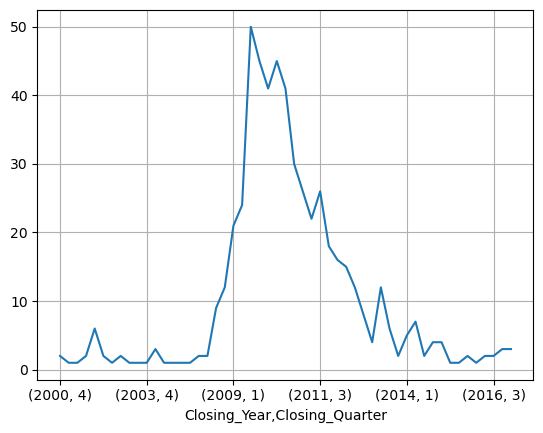

In [59]:
banks.groupby(['Closing_Year','Closing_Quarter']).size().plot(grid= True)

## 日期时间索引 datetimeIndex

In [61]:
tesla_stock = pd.read_csv('data/TSLA.csv',parse_dates=[0])

In [62]:
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1215 non-null   datetime64[ns]
 1   High       1215 non-null   float64       
 2   Low        1215 non-null   float64       
 3   Open       1215 non-null   float64       
 4   Close      1215 non-null   float64       
 5   Volume     1215 non-null   int64         
 6   Adj Close  1215 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 66.6 KB


In [63]:
tesla_stock['Open'].min()

142.32000732421875

In [64]:
tesla_stock.info()
tesla_stock['Open'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1215 non-null   datetime64[ns]
 1   High       1215 non-null   float64       
 2   Low        1215 non-null   float64       
 3   Open       1215 non-null   float64       
 4   Close      1215 non-null   float64       
 5   Volume     1215 non-null   int64         
 6   Adj Close  1215 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 66.6 KB


1011.8499755859376

In [96]:
tesla_stock[(tesla_stock['Date'].dt.year==2015) & (tesla_stock['Date'].dt.month==8)]

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
7 days,2015-08-26,228.000000,215.509995,227.929993,224.839996,4963000,224.839996
8 days,2015-08-27,244.750000,230.809998,231.000000,242.990005,7656000,242.990005
9 days,2015-08-28,251.449997,241.570007,241.860001,248.479996,5513700,248.479996
12 days,2015-08-31,254.949997,245.509995,245.619995,249.059998,4700200,249.059998


In [68]:
tesla_stock.set_index('Date',inplace=True)

In [74]:
tesla_stock.loc['2015-08']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
2015-08-26,228.000000,215.509995,227.929993,224.839996,4963000,224.839996
2015-08-27,244.750000,230.809998,231.000000,242.990005,7656000,242.990005
2015-08-28,251.449997,241.570007,241.860001,248.479996,5513700,248.479996
2015-08-31,254.949997,245.509995,245.619995,249.059998,4700200,249.059998


- 如果是一个时间点 TimeStamp
- 如果是一列数据是时间 datetime64   把这个设置成index → datetimeIndex
- 如果一列数据是两个datetime 相减得到的 timedelta64  → timedeltaIndex

In [77]:
tesla_stock.reset_index(inplace=True)

In [82]:
tesla_stock['ref_date'] = tesla_stock['Date']-tesla_stock['Date'].min()

In [83]:
tesla_stock.set_index('ref_date',inplace=True)

In [86]:
tesla_stock.index

TimedeltaIndex([   '0 days',    '1 days',    '2 days',    '5 days',
                   '6 days',    '7 days',    '8 days',    '9 days',
                  '12 days',   '13 days',
                ...
                '1750 days', '1751 days', '1752 days', '1755 days',
                '1756 days', '1757 days', '1758 days', '1759 days',
                '1762 days', '1763 days'],
               dtype='timedelta64[ns]', name='ref_date', length=1215, freq=None)

In [90]:
tesla_stock

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
...,...,...,...,...,...,...,...
1757 days,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049
1758 days,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027
1759 days,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029


In [89]:
tesla_stock.loc['0 days':'4 days']

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004


In [100]:
tesla_stock.sort_index(ascending=False)['4 days':'0 days']

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993


## 生成日期时间序列

In [91]:
pd.date_range('2023-08-01','2023-10-30',freq='B')

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13', '2023-10-16', '2023-10-17',
      

In [92]:
pd.date_range('2023-08-01','2023-10-30',freq='2B')

DatetimeIndex(['2023-08-01', '2023-08-03', '2023-08-07', '2023-08-09',
               '2023-08-11', '2023-08-15', '2023-08-17', '2023-08-21',
               '2023-08-23', '2023-08-25', '2023-08-29', '2023-08-31',
               '2023-09-04', '2023-09-06', '2023-09-08', '2023-09-12',
               '2023-09-14', '2023-09-18', '2023-09-20', '2023-09-22',
               '2023-09-26', '2023-09-28', '2023-10-02', '2023-10-04',
               '2023-10-06', '2023-10-10', '2023-10-12', '2023-10-16',
               '2023-10-18', '2023-10-20', '2023-10-24', '2023-10-26',
               '2023-10-30'],
              dtype='datetime64[ns]', freq='2B')

In [94]:
pd.date_range('2023-08-01','2023-10-30',freq='WOM-1THU')
pd.date_range('2023-08-01','2023-10-30',freq='WOM-3FRI')

DatetimeIndex(['2023-08-18', '2023-09-15', '2023-10-20'], dtype='datetime64[ns]', freq='WOM-3FRI')

In [102]:
ebola['Date'].dt.dayofweek

0      0
1      6
2      5
3      4
4      2
      ..
117    3
118    2
119    1
120    0
121    5
Name: Date, Length: 122, dtype: int64

## 日期时间类型练习

In [104]:
crime = pd.read_csv('data/crime.csv',parse_dates=['REPORTED_DATE'])

In [105]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [106]:
crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [107]:
# 把报警时间设置为行索引
crime.set_index('REPORTED_DATE',inplace=True)

In [109]:
crime.loc['2016-05-11']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-11 00:05:00,disturbing-the-peace,public-disorder,-105.066050,39.654299,bear-valley,1,0
2016-05-11 00:38:00,theft-of-motor-vehicle,auto-theft,-104.941259,39.773240,elyria-swansea,1,0
2016-05-11 03:50:00,drug-poss-paraphernalia,drug-alcohol,-104.970497,39.768277,cole,1,0
2016-05-11 04:17:00,police-false-information,all-other-crimes,-105.053182,39.675607,harvey-park,1,0
2016-05-11 03:40:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.989308,39.761519,five-points,1,0
...,...,...,...,...,...,...,...
2016-05-11 20:13:00,traffic-accident,traffic-accident,-104.903433,39.778300,stapleton,0,1
2016-05-11 01:55:00,traf-other,all-other-crimes,-104.981523,39.757469,five-points,1,0
2016-05-11 01:39:00,public-order-crimes-other,all-other-crimes,-104.987565,39.700698,baker,1,0


In [116]:
crime.loc['2015-3-1 12:57:00':'2016-01-13 15:26:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-01-13 15:26:00,drug-hallucinogen-sell,drug-alcohol,-104.998843,39.741401,cbd,1,0
2015-12-18 23:51:00,theft-of-motor-vehicle,auto-theft,-105.024694,39.708538,athmar-park,1,0
2015-11-16 14:59:00,traffic-accident,traffic-accident,-105.050370,39.740281,west-colfax,0,1
2015-06-08 06:46:00,traffic-accident,traffic-accident,-104.994822,39.768386,globeville,0,1
2015-09-30 12:15:00,traffic-accident,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
...,...,...,...,...,...,...,...
2015-05-11 19:24:00,disturbing-the-peace,public-disorder,-104.937341,39.687357,virginia-village,1,0
2015-10-19 14:08:00,harassment-sexual-in-nature,public-disorder,-104.997041,39.737290,lincoln-park,1,0
2015-12-08 13:09:00,fraud-identity-theft,white-collar-crime,-105.064441,39.654373,bear-valley,1,0


In [113]:
crime.loc['2015-03-01':'2016-03-01']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23464\629251448.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-03-01':'2016-03-01']


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-01-13 15:26:00,drug-hallucinogen-sell,drug-alcohol,-104.998843,39.741401,cbd,1,0
2015-12-18 23:51:00,theft-of-motor-vehicle,auto-theft,-105.024694,39.708538,athmar-park,1,0
2015-11-16 14:59:00,traffic-accident,traffic-accident,-105.050370,39.740281,west-colfax,0,1
2015-06-08 06:46:00,traffic-accident,traffic-accident,-104.994822,39.768386,globeville,0,1
2015-09-30 12:15:00,traffic-accident,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
...,...,...,...,...,...,...,...
2016-01-28 13:47:00,violation-of-restraining-order,all-other-crimes,-104.994883,39.730313,lincoln-park,1,0
2016-02-12 10:48:00,traffic-accident-hit-and-run,traffic-accident,-104.965374,39.743159,city-park-west,0,1
2015-12-24 13:56:00,theft-other,larceny,-104.956983,39.665810,wellshire,1,0


In [118]:
# 查询凌晨2点到凌晨5点的报警记录
crime.between_time('2:00','5:00',include_start=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23464\2964011081.py:2: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  crime.between_time('2:00','5:00',include_start=False)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
2014-06-29 02:56:00,traffic-accident-dui-duid,traffic-accident,-105.052956,39.733315,villa-park,0,1
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [119]:
crime.at_time('5:43')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-10-06 05:43:00,theft-of-motor-vehicle,auto-theft,-105.038353,39.673947,harvey-park,1,0
2017-02-21 05:43:00,criminal-mischief-other,public-disorder,-105.018762,39.733304,sun-valley,1,0
2017-04-10 05:43:00,theft-of-motor-vehicle,auto-theft,-104.756682,39.775239,gateway-green-valley-ranch,1,0
2017-05-01 05:43:00,theft-of-motor-vehicle,auto-theft,-105.047536,39.696609,mar-lee,1,0
2017-05-12 05:43:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.093418,39.633491,marston,1,0
...,...,...,...,...,...,...,...
2012-04-15 05:43:00,weapon-by-prev-offender-powpo,all-other-crimes,-105.010912,39.710724,athmar-park,1,0
2013-06-08 05:43:00,public-order-crimes-other,all-other-crimes,-104.982946,39.715058,speer,1,0
2013-06-08 05:43:00,theft-of-motor-vehicle,auto-theft,-104.892416,39.653733,hampden,1,0


In [120]:
crime_sorted = crime.sort_index()

In [121]:
%timeit crime.loc['2015-03-01':'2016-03-01']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


12.5 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [122]:
%timeit crime_sorted.loc['2015-03-01':'2016-03-01']

864 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [124]:
# 统计每周报警数量
crime_sorted.resample('W').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [125]:
crime_sorted.loc[:'2012-1-8']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:23:00,criminal-mischief-mtr-veh,public-disorder,-104.959418,39.755044,skyland,1,0
2012-01-08 23:23:00,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.986622,39.705213,washington-park-west,1,0
2012-01-08 23:46:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.991384,39.753888,five-points,1,0


In [126]:
crime_sorted.loc['2012-1-9':'2012-1-15']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-09 00:04:00,traffic-accident-hit-and-run,traffic-accident,-104.973343,39.760757,five-points,0,1
2012-01-09 00:05:00,fraud-criminal-impersonation,white-collar-crime,-105.024676,39.712702,valverde,1,0
2012-01-09 01:48:00,traffic-accident-dui-duid,traffic-accident,-104.975428,39.772960,five-points,0,1
2012-01-09 02:09:00,theft-of-motor-vehicle,auto-theft,-105.029413,39.757461,sloan-lake,1,0
2012-01-09 02:26:00,criminal-mischief-other,public-disorder,-104.770694,39.822671,dia,1,0
...,...,...,...,...,...,...,...
2012-01-15 23:16:00,robbery-street,robbery,-104.993926,39.746143,cbd,1,0
2012-01-15 23:18:00,assault-simple,other-crimes-against-persons,-105.052765,39.654618,harvey-park-south,1,0
2012-01-15 23:23:00,burglary-business-by-force,burglary,-104.853150,39.783152,montbello,1,0


In [127]:
crime_sorted.resample('W-THU').size()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

<Axes: xlabel='REPORTED_DATE'>

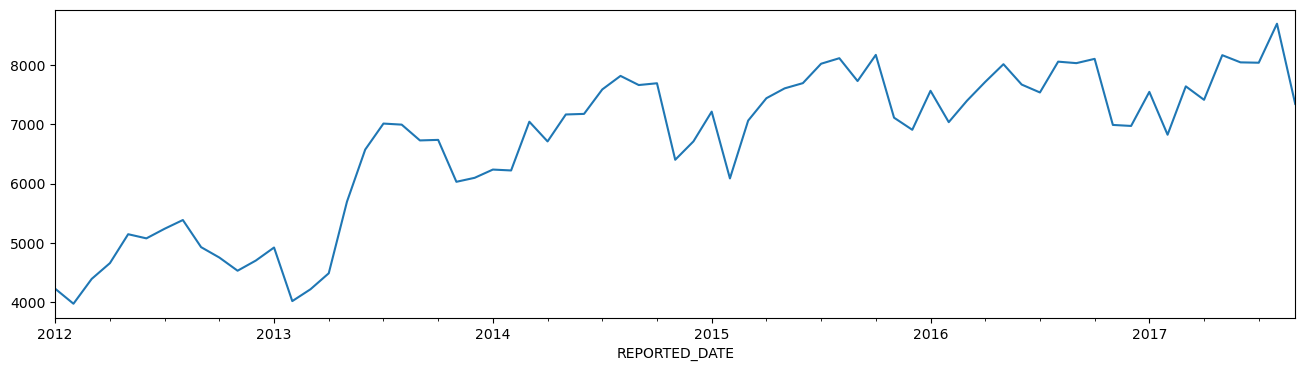

In [131]:
crime_sorted.resample('M').size().plot(figsize=(16,4))

<Axes: xlabel='REPORTED_DATE'>

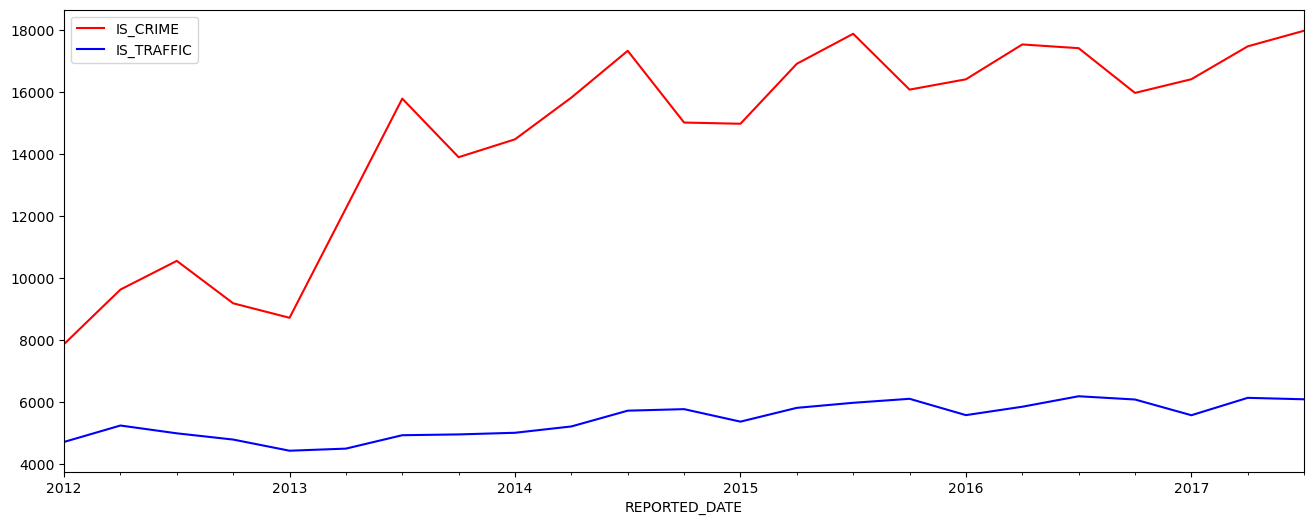

In [136]:
# 分析每季度的犯罪和交通事故数据
crime_sorted.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum().plot(figsize=(16,6),color=['red','blue'])

<Axes: xlabel='REPORTED_DATE'>

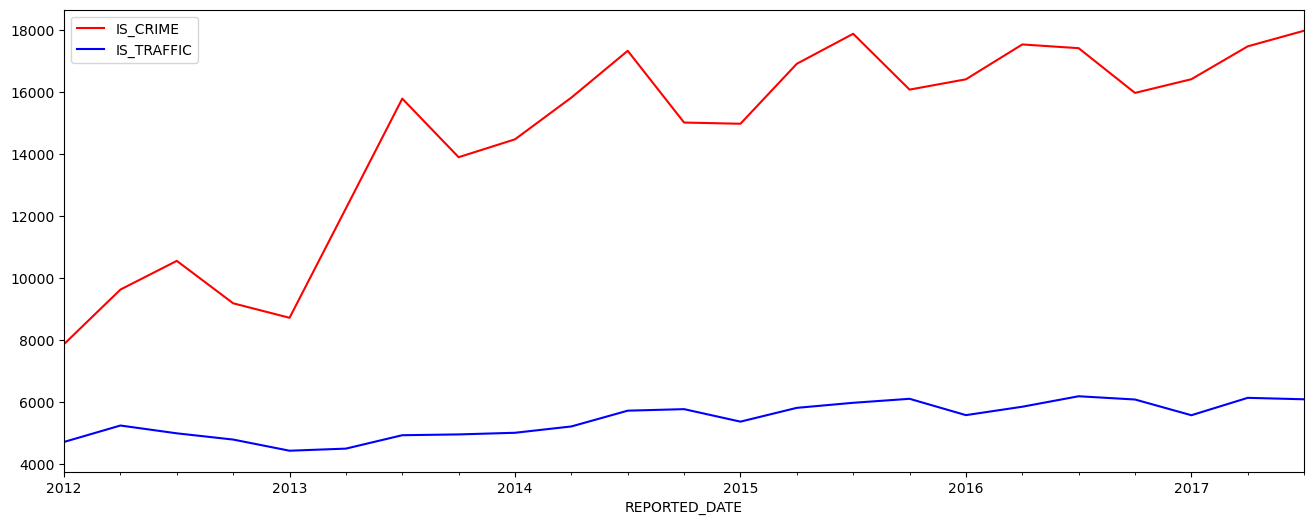

In [139]:
plot_kwargs = dict(figsize=(16,6),color=['red','blue'])
crime_sorted.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum().plot(**plot_kwargs)

In [138]:
plot_kwargs

{'figsize': (16, 6), 'color': ['red', 'blue']}

<Axes: >

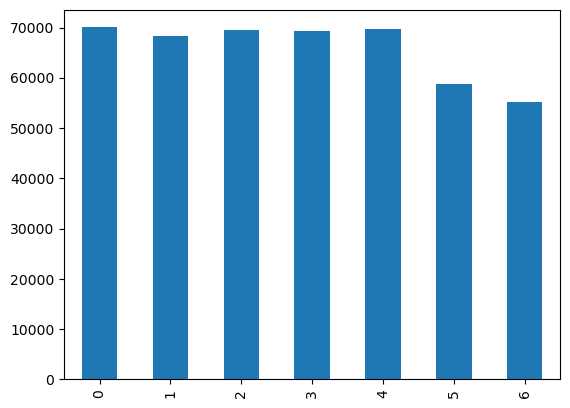

In [149]:
# 分析工作日的犯罪情况
crime_sorted.reset_index()['REPORTED_DATE'].dt.weekday.value_counts().sort_index().plot(kind = 'bar')
# kind = 'barh'